In [2]:
import pandas as pd

# Best “happy path” import
df = pd.read_csv("f1RacesYear.csv") 

# Quick sanity check
print(df.head())
print(df.info())

   Year  Races  Winning Driver  Driver Points      WinningTeam  Team Points  \
0  2025     24    Lando Norris          423.0          McLaren        833.0   
1  2024     24  Max Verstappen          437.0          McLaren        666.0   
2  2023     22  Max Verstappen          575.0  Red Bull Racing        860.0   
3  2022     23  Max Verstappen          454.0  Red Bull Racing        759.0   
4  2021     22  Max Verstappen          395.5         Mercedes        613.5   

                 Engine  
0              Mercedes  
1              Mercedes  
2  Red Bull Racing RBPT  
3  Red Bull Racing RBPT  
4              Mercedes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            76 non-null     int64  
 1   Races           76 non-null     int64  
 2   Winning Driver  76 non-null     object 
 3   Driver Points   76 non-null     float

### Let's get just the races per year for charting

In [3]:
df_year_races = df[["Year", "Races"]].copy()

print(df_year_races.head())

   Year  Races
0  2025     24
1  2024     24
2  2023     22
3  2022     23
4  2021     22


### chart it

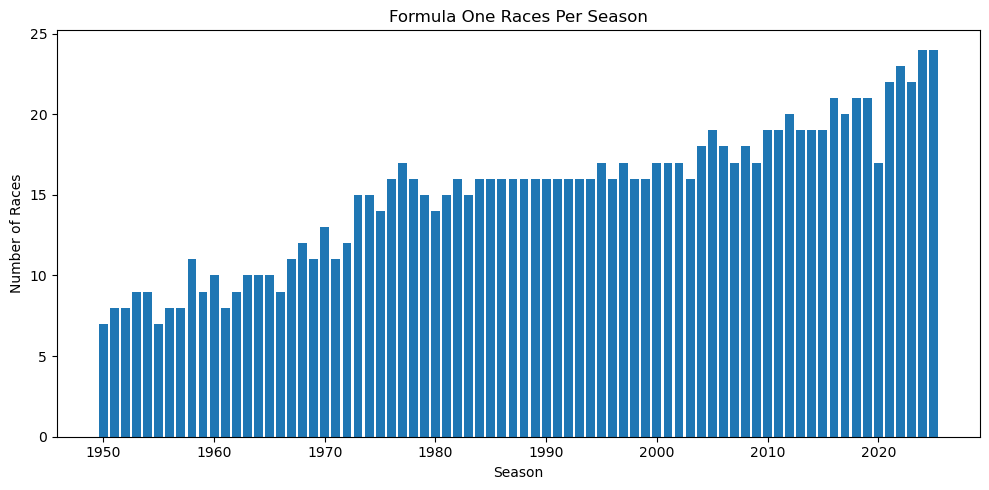

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_year_races["Year"], df_year_races["Races"])

plt.xlabel("Season")
plt.ylabel("Number of Races")
plt.title("Formula One Races Per Season")

plt.tight_layout()
plt.show()

In [6]:
# Ensure data is sorted by year
df_sorted = df_year_races.sort_values("Year").reset_index(drop=True)

# Create a new column that increments whenever Races changes
df_sorted["race_bin"] = (
    df_sorted["Races"]
    .ne(df_sorted["Races"].shift())
    .cumsum()
)

print(df_sorted)

    Year  Races  race_bin
0   1950      7         1
1   1951      8         2
2   1952      8         2
3   1953      9         3
4   1954      9         3
..   ...    ...       ...
71  2021     22        49
72  2022     23        50
73  2023     22        51
74  2024     24        52
75  2025     24        52

[76 rows x 3 columns]


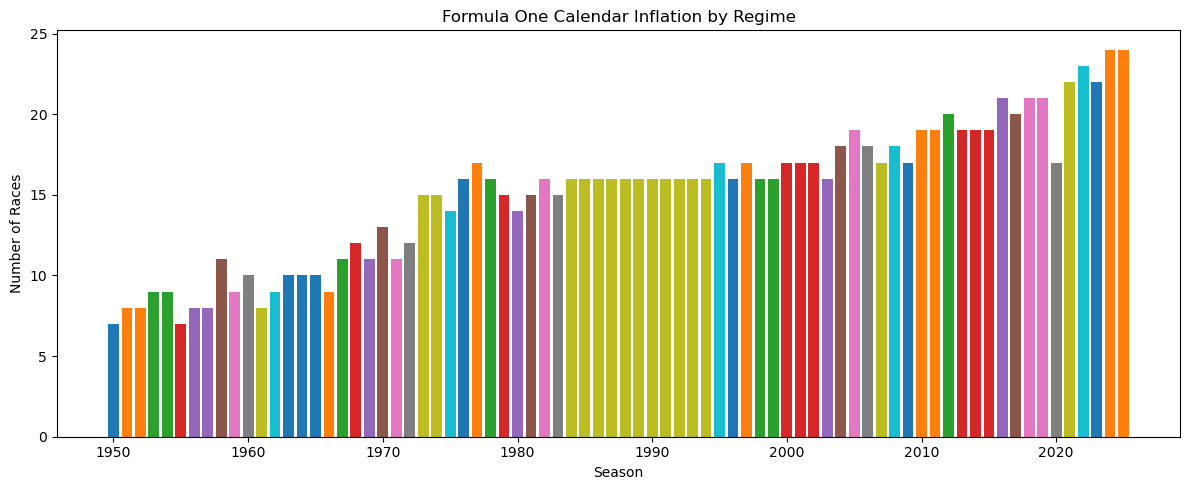

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

for bin_id, group in df_sorted.groupby("race_bin"):
    plt.bar(
        group["Year"],
        group["Races"],
        width=0.8
    )

plt.xlabel("Season")
plt.ylabel("Number of Races")
plt.title("Formula One Calendar Inflation by Regime")

plt.tight_layout()
plt.show()